In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
temp_country = pd.read_csv('../data/cleaned/global_temperatures_by_country_1900_2012_cleaned.csv')
temp_country['country'].unique()

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt'

In [4]:
country_top10_temp = ['United States','China','Russia','Japan','India','United Kingdom','Canada','France','Germany','Italy']

In [6]:
temp_country_top10 = temp_country[temp_country['country'].isin(country_top10_temp)]
temp_country_top10.tail()

,Unnamed: 0,date,average_temperature,average_temperature_unvertainty,country
307735,557807,2012-08-01,21.422,0.251,United States
307736,557808,2012-09-01,17.036,0.185,United States
307737,557809,2012-10-01,9.688,0.225,United States
307738,557810,2012-11-01,3.330,0.120,United States
307739,557811,2012-12-01,-1.261,0.228,United States


In [7]:
temp_country_top10['date']=pd.to_datetime(temp_country_top10['date'])

C:\Users\schue\AppData\Local\Temp\ipykernel_37108\2076103652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_country_top10['date']=pd.to_datetime(temp_country_top10['date'])


In [8]:
temp_country_top10['year']= temp_country_top10['date'].dt.year
temp_country_top10

C:\Users\schue\AppData\Local\Temp\ipykernel_37108\2743915740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_country_top10['year']= temp_country_top10['date'].dt.year


,Unnamed: 0,date,average_temperature,average_temperature_unvertainty,country,year
54240,98831,1900-01-01,-23.610,0.874,Canada,1900
54241,98832,1900-02-01,-22.475,1.083,Canada,1900
54242,98833,1900-03-01,-16.527,0.821,Canada,1900
54243,98834,1900-04-01,-4.487,1.029,Canada,1900
54244,98835,1900-05-01,3.231,0.865,Canada,1900
...,...,...,...,...,...,...
307735,557807,2012-08-01,21.422,0.251,United States,2012
307736,557808,2012-09-01,17.036,0.185,United States,2012
307737,557809,2012-10-01,9.688,0.225,United States,2012
307738,557810,2012-11-01,3.330,0.120,United States,2012


In [9]:
temp_country_top10_pivot = pd.pivot_table(temp_country_top10, index=['country','year'], values='average_temperature', aggfunc=np.mean).reset_index()
temp_country_top10_pivot

C:\Users\schue\AppData\Local\Temp\ipykernel_37108\500322281.py:1: FutureWarning: The provided callable <function mean at 0x0000029FD5BF3740> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  temp_country_top10_pivot = pd.pivot_table(temp_country_top10, index=['country','year'], values='average_temperature', aggfunc=np.mean).reset_index()


,country,year,average_temperature
0,Canada,1900,-5.018750
1,Canada,1901,-5.052250
2,Canada,1902,-5.170917
3,Canada,1903,-5.302583
4,Canada,1904,-5.905083
...,...,...,...
1125,United States,2008,8.951417
1126,United States,2009,9.137083
1127,United States,2010,9.505583
1128,United States,2011,9.549917


In [11]:
temp_country_top10 = pd.pivot(temp_country_top10_pivot, index='country', columns='year', values='average_temperature').reset_index()
temp_country_top10

year,country,1900,1901,1902,1903,1904,1905,1906,1907,1908,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Canada,-5.018750,-5.052250,-5.170917,-5.302583,-5.905083,-5.106417,-5.049417,-6.563083,-5.241417,...,-3.859500,-4.923083,-3.308750,-2.460167,-4.060917,-4.295250,-4.135083,-1.887917,-3.557083,-3.176833
1,China,6.444167,6.537500,6.744667,6.174583,6.350833,5.755500,6.221833,6.308667,6.286583,...,7.522000,7.712750,7.413500,7.948000,8.126750,7.566083,7.809500,7.548417,7.357083,7.077083
2,France,12.987333,12.328417,12.391917,12.592333,12.813250,12.419667,12.714500,12.508250,12.448417,...,14.337917,13.664083,13.694250,14.143833,13.896583,13.581500,13.941667,13.115417,14.479583,13.707167
3,Germany,8.452083,7.681083,7.256667,8.402417,8.400333,8.027417,8.354000,7.852583,7.521333,...,9.494250,9.053417,9.128417,9.706000,9.997500,9.642167,9.359167,8.009000,9.819583,9.227167
4,India,24.367833,24.084250,24.318667,23.767417,23.758500,23.515000,23.888083,23.677083,23.741917,...,24.649917,24.634583,24.495417,24.732083,24.649917,24.406000,25.146667,25.050833,24.415583,24.640833
5,Italy,12.998000,12.205583,12.516750,12.473750,12.932167,12.243083,12.330167,12.420833,12.338500,...,14.296917,13.559833,13.028583,13.787333,14.073333,13.881250,14.052917,13.324917,14.173167,14.079000
6,Japan,11.473667,11.680167,11.523750,11.843333,11.770167,11.597417,11.183917,11.403167,11.096000,...,12.507000,13.435667,12.555917,12.757083,13.192167,12.874917,12.933833,13.215583,12.737750,12.565667
7,Russia,-5.874333,-5.460083,-7.002750,-5.352583,-5.418500,-5.687083,-5.101750,-6.041417,-6.122583,...,-3.832833,-4.493583,-3.498083,-4.763000,-2.975083,-3.305417,-4.608500,-4.520583,-3.401583,-3.901750
8,United Kingdom,8.550417,8.379167,8.001500,8.329333,8.263833,8.390417,8.510833,8.093250,8.576417,...,9.742083,9.737333,9.655250,9.943417,9.797500,9.348250,9.453333,8.394333,9.907917,9.037417
9,United States,9.021583,8.494917,8.454000,7.977250,8.200667,8.402333,8.560083,8.394000,8.755583,...,9.755083,9.667500,9.892667,9.974500,9.837500,8.951417,9.137083,9.505583,9.549917,10.261083


In [12]:
list_of_col = temp_country_top10.columns
for x in list_of_col:
    if (x != 'country') & (x != 1900):        
        temp_country_top10[f"diff{x}"] = temp_country_top10[x-1] - temp_country_top10[x]
    else:
        pass   

C:\Users\schue\AppData\Local\Temp\ipykernel_37108\315893022.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  temp_country_top10[f"diff{x}"] = temp_country_top10[x-1] - temp_country_top10[x]
C:\Users\schue\AppData\Local\Temp\ipykernel_37108\315893022.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  temp_country_top10[f"diff{x}"] = temp_country_top10[x-1] - temp_country_top10[x]
C:\Users\schue\AppData\Local\Temp\ipykernel_37108\315893022.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of

In [13]:
temp_country_top10_diff = temp_country_top10.drop(columns=list_of_col[1:], axis=1)

In [15]:
modified_list_of_col = pd.Index([x for x in list_of_col if x != 1980])
temp_country_top10_diff.columns = modified_list_of_col
temp_country_top10_diff

,country,1900,1901,1902,1903,1904,1905,1906,1907,1908,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Canada,0.033500,0.118667,0.131667,0.602500,-0.798667,-0.057000,1.513667,-1.321667,0.666417,...,-0.503333,1.063583,-1.614333,-0.848583,1.600750,0.234333,-0.160167,-2.247167,1.669167,-0.380250
1,China,-0.093333,-0.207167,0.570083,-0.176250,0.595333,-0.466333,-0.086833,0.022083,-0.094667,...,0.273667,-0.190750,0.299250,-0.534500,-0.178750,0.560667,-0.243417,0.261083,0.191333,0.280000
2,France,0.658917,-0.063500,-0.200417,-0.220917,0.393583,-0.294833,0.206250,0.059833,0.341167,...,-0.289750,0.673833,-0.030167,-0.449583,0.247250,0.315083,-0.360167,0.826250,-1.364167,0.772417
3,Germany,0.771000,0.424417,-1.145750,0.002083,0.372917,-0.326583,0.501417,0.331250,0.184500,...,0.143083,0.440833,-0.075000,-0.577583,-0.291500,0.355333,0.283000,1.350167,-1.810583,0.592417
4,India,0.283583,-0.234417,0.551250,0.008917,0.243500,-0.373083,0.211000,-0.064833,0.080917,...,0.263083,0.015333,0.139167,-0.236667,0.082167,0.243917,-0.740667,0.095833,0.635250,-0.225250
5,Italy,0.792417,-0.311167,0.043000,-0.458417,0.689083,-0.087083,-0.090667,0.082333,0.192500,...,-0.362917,0.737083,0.531250,-0.758750,-0.286000,0.192083,-0.171667,0.728000,-0.848250,0.094167
6,Japan,-0.206500,0.156417,-0.319583,0.073167,0.172750,0.413500,-0.219250,0.307167,-0.292750,...,0.330333,-0.928667,0.879750,-0.201167,-0.435083,0.317250,-0.058917,-0.281750,0.477833,0.172083
7,Russia,-0.414250,1.542667,-1.650167,0.065917,0.268583,-0.585333,0.939667,0.081167,-0.257500,...,-0.290083,0.660750,-0.995500,1.264917,-1.787917,0.330333,1.303083,-0.087917,-1.119000,0.500167
8,United Kingdom,0.171250,0.377667,-0.327833,0.065500,-0.126583,-0.120417,0.417583,-0.483167,0.681167,...,-0.062417,0.004750,0.082083,-0.288167,0.145917,0.449250,-0.105083,1.059000,-1.513583,0.870500
9,United States,0.526667,0.040917,0.476750,-0.223417,-0.201667,-0.157750,0.166083,-0.361583,0.533750,...,0.061083,0.087583,-0.225167,-0.081833,0.137000,0.886083,-0.185667,-0.368500,-0.044333,-0.711167


In [49]:
temp_country_top10_diff_long = pd.melt(temp_country_top10_diff, id_vars='country', value_vars=temp_country_top10_diff.columns[1:], value_name='average_temperature')
temp_country_top10_diff_long

,country,variable,average_temperature
0,Canada,1900,0.033500
1,China,1900,-0.093333
2,France,1900,0.658917
3,Germany,1900,0.771000
4,India,1900,0.283583
...,...,...,...
1115,Italy,2012,0.094167
1116,Japan,2012,0.172083
1117,Russia,2012,0.500167
1118,United Kingdom,2012,0.870500


In [50]:
temp_country_top10_diff_long.rename(columns={'variable':'year'}, inplace=True)
temp_country_top10_diff_long.sort_values(by=['country','year'], axis=0, ascending=True, inplace=True)
temp_country_top10_diff_long.reset_index(drop=True, inplace=True)
temp_country_top10_diff_long

,country,year,average_temperature
0,Canada,1900,0.033500
1,Canada,1901,0.118667
2,Canada,1902,0.131667
3,Canada,1903,0.602500
4,Canada,1904,-0.798667
...,...,...,...
1115,United States,2008,0.886083
1116,United States,2009,-0.185667
1117,United States,2010,-0.368500
1118,United States,2011,-0.044333


<Axes: xlabel='year', ylabel='average_temperature'>

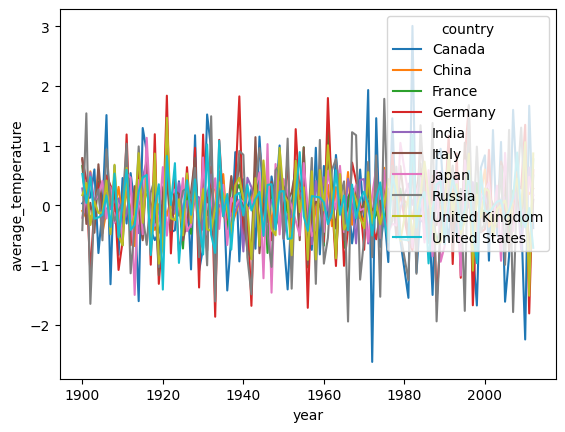

In [51]:
sns.lineplot(data=temp_country_top10_diff_long, x='year', y='average_temperature', hue='country')

<Axes: xlabel='year', ylabel='average_temperature'>

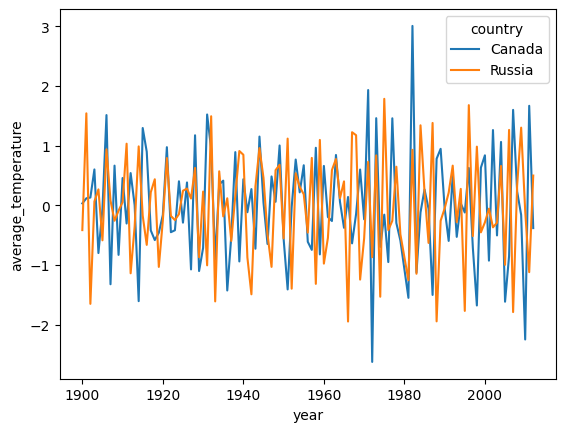

In [52]:
sns.lineplot(data=temp_country_top10_diff_long[temp_country_top10_diff_long['country'].isin(['Canada','Russia'])], x='year', y='average_temperature', hue='country')

In [54]:
temp_country_top10_diff_long.to_csv('../data/cleaned/annual_increase_of_temp_by_country.csv', index=False)